### Project 2: (10 points)
##### Total (20 points) --> your total will divided by 2 to get 10 points.

To demonstrate clustring, we will be use an adapted version of the glass dataset from the University of California – Irvine.
This data contains 218 observations and 9 features corresponding to the percent weight of various oxides found in glass:

* RI: refractive index
* Na: weight percent in sodium
* Mg: weight percent in magnesium
* Al: weight percent in aluminum
* Si: weight percent in silicon
* K: weight percent in potassium
* Ca: weight percent in calcium
* Ba: weight percent in barium
* Fe: weight percent in iron

In this case study, we will use the refractive index (RI) and weight percent in each oxide to segment the glass type.

**Dataset:**
You can find the dataset (glass.csv) under the datasets section on the Canvas.

### Step to do:

        1. Importing Packages Required:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

    2. Read the Data in the Memory.

In [15]:
glass_data = pd.read_csv('glass.csv')

    3. Print the Size of the Dataset and Printing the First Few Rows of the Dataset

In [16]:
print(glass_data.shape)
glass_data.head()

(218, 9)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


    4. Look for some basic data frame information  ( 1 point)

In [17]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      218 non-null    float64
 1   Na      218 non-null    float64
 2   Mg      218 non-null    float64
 3   Al      218 non-null    float64
 4   Si      218 non-null    float64
 5   K       218 non-null    float64
 6   Ca      218 non-null    float64
 7   Ba      218 non-null    float64
 8   Fe      218 non-null    float64
dtypes: float64(9)
memory usage: 15.5 KB


    5. Remove any possible order effects in the data by shuffle the rows prior to building any models and save it as a new data frame object.  ( 1 point)


In [18]:
df_shuffled = shuffle(glass_data, random_state=42)

    6. Transform each observation into a z-score  ( 1 point)

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_shuffled)

    7. Perform hierarchical clustering using the linkage function on scaled_features with complete method.  ( 1 point)

In [20]:
# create linkage model
HCA_model = linkage(scaled_features, method='complete')

Now that the HCA model has been built, we will continue with the analysis by visualizing clusters using a dendrogram and using the visualization to generate predictions.

    8. Display the dendrogram by plotting the HCA model:  ( 1 point)
    - the leaf_rotation is 90 and , leaf_font_size is 6

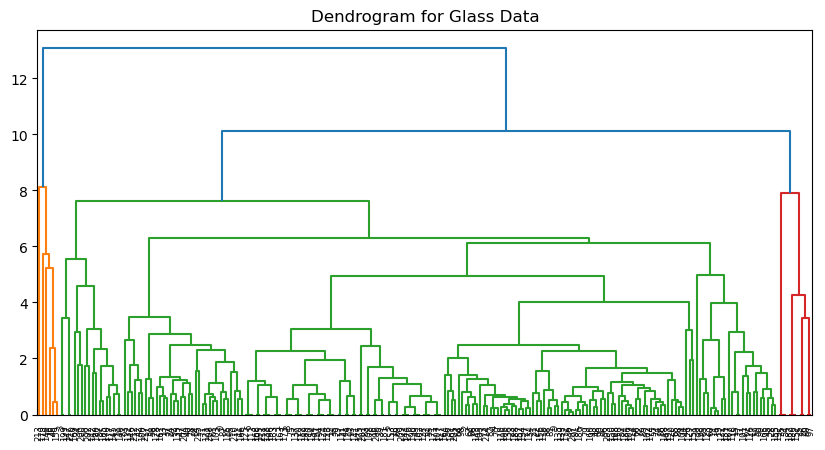

In [21]:
# plot dendrogram:
plt.figure(figsize=(10,5))
plt.title('Dendrogram for Glass Data')
dendrogram(HCA_model, leaf_rotation=90, leaf_font_size=6)
plt.show()

    9. interpret the HCA dendrogram,  ( 1 point)
    
The HCA dendrogram shows that it is three-leaved(trifolious) structure with 3 colored clusters(orange,green and red).
There are two ways to interpret a dendrogram: in terms of large-scale groups or in terms of similarities
among individual chunks.To identify large-scale groups, we read top down while to identify which individual segments are most similar to each other, we read the dendrogram from the bottom up, identifying the first clades to join together as we move from bottom to top. 

Therefore it shows green cluster is large-scale group as moving top down and this cluster is having more similarity with the red cluster as moving bottom to up.

utilizing HCA clusters our data into three groups

HCA has drawbacks include:

1. Vagueness in terms of the termination criteria (that is, when to finalize the number of clusters)
2. The algorithm cannot adjust once the clustering decisions have been made
3. Can be very computationally expensive to build HCA models on large datasets with many features

To address some of the HCA shortcomings,  use k-means, which has the ability to adjust when the clusters have been initially generated. It is more computationally frugal than HCA.

    10. Compute Silhouette score to measure how close observations within a cluster and plot the results.  ( 2 points)

In [24]:
cluster_range = range(2, 11)
silhouette_scores = [] # Storing Silhouette scores for each cluster number
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
print(silhouette_scores)

[0.40642408634553906, 0.42558991406081287, 0.3947080381050245, 0.3875124346587112, 0.4239579619447725, 0.4363156719628989, 0.40386586084524395, 0.42129972630291673, 0.41069680989267937]


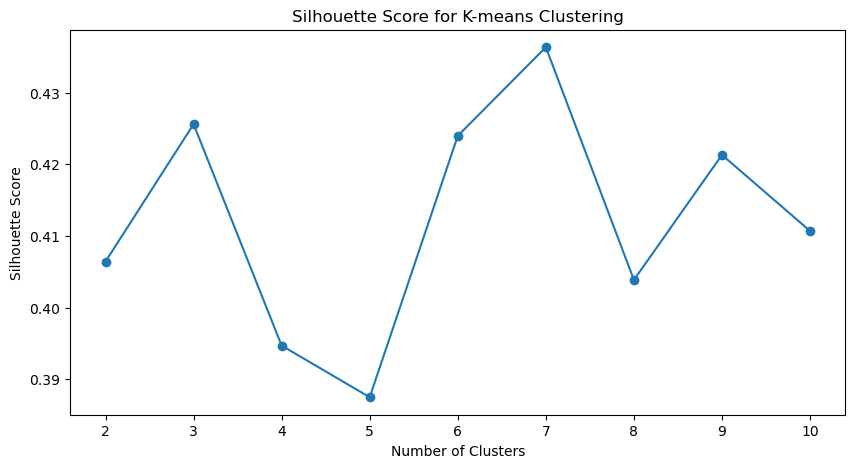

In [27]:
plt.figure(figsize = (10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

    11. apply k-Means Clustering for Optimal Number of Clusters  ( 1 point)

In [30]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
df_shuffled['Cluster_Labels'] = cluster_labels

    12. print the number of glasses that fall within each of clusters. ( 2 points)

In [34]:
cluster_counts = df_shuffled['Cluster_Labels'].value_counts()
print("Number of glasses in each cluster:")
print(cluster_counts)

Number of glasses in each cluster:
0    84
1    59
3    36
4    32
2     7
Name: Cluster_Labels, dtype: int64


    13. Using PCA to Transform Group-Related Features into Components  ( 1 point)

In [35]:
pca_model = PCA()
pca_model = pca_model.fit(scaled_features)

    14. Get proportion of explained variance in each component ( 2 points)

In [37]:
# get proportion of explained variance in each component
explained_var_ratio = pca_model.explained_variance_ratio_
# print the explained variance ratio
print(explained_var_ratio)

[3.53143625e-01 2.50532563e-01 1.25244721e-01 9.69358544e-02
 9.26479607e-02 4.62631534e-02 2.77498886e-02 7.37245537e-03
 1.09779199e-04]


    15. Get the cumulative sum of explained variance by each component and plot the result.  ( 2 points)

In [38]:
# get the cumulative sum of explained variance by each component
cum_sum_explained_var = np.cumsum(explained_var_ratio)
print(cum_sum_explained_var)

[0.35314362 0.60367619 0.72892091 0.82585676 0.91850472 0.96476788
 0.99251777 0.99989022 1.        ]


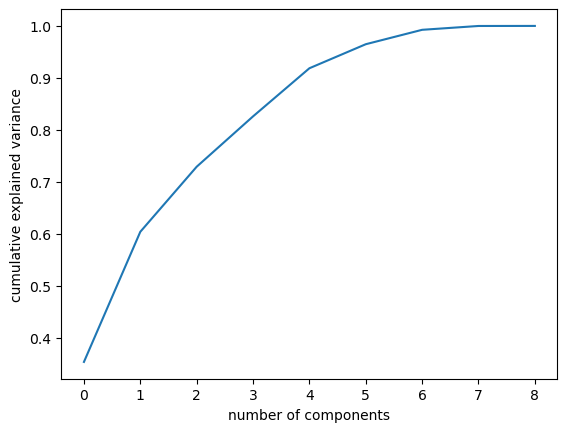

In [39]:
plt.plot(cum_sum_explained_var )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

    16. Fit the PCA model with the best number of components ( 2 points)

In [41]:
pca_model = PCA(n_components=6)

# fit model and transform scaled_features into best_n_components
pca_model = pca_model.fit_transform(scaled_features)

    17. Plot the first and second components ( 2 points)

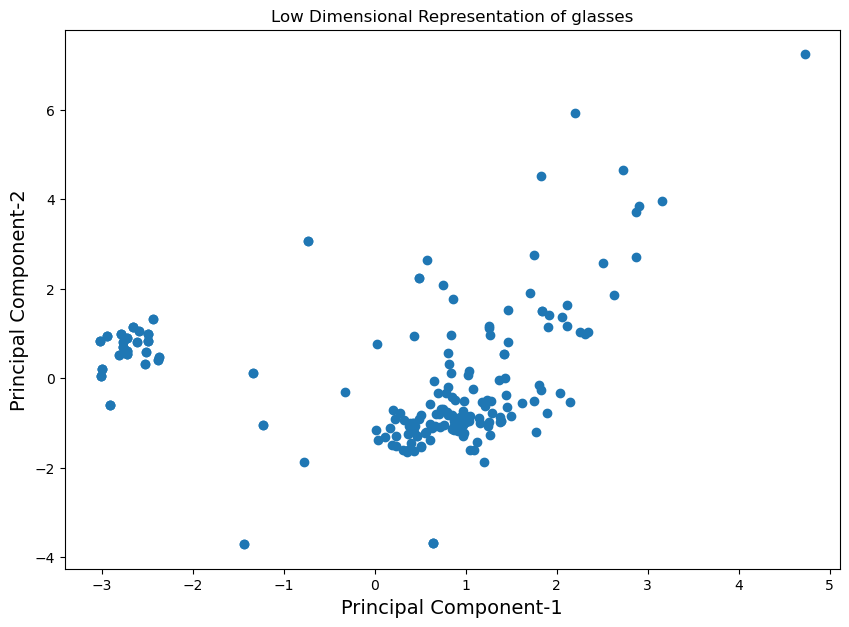

In [43]:
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of glasses')

## write your code here:
plt.xlabel('Principal Component-1',fontsize=14)
plt.ylabel('Principal Component-2',fontsize=14)
plt.scatter(pca_model[:,0], pca_model[:,1], )
plt.show()